In [62]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
# Import our input dataset
companies_df = pd.read_csv("All.csv")
companies_df.head()

,sector,Name,symbol,code,year,Current ratio,Quick Ratio,Cash ratio,Operating cash flow ratio,Working capital ratio,...,EV / EBIT,EV / Free Cash Flow,EV / Invested Capital,EV / Revenue,P/E Ratio,Price/Book,Dividend Per Share,Altman Z-Score,Piotroski Score,Classification
0,Academic & Education,Global Education Communities,GEC,A&E 01,2013,0.63,0.61,0.20,-0.10,0.63,...,-6.2x,-4.0x,0.9x,0.9x,-5.9x,1.1x,0.0,-3.1,0,0
1,Academic & Education,Global Education Communities,GEC,A&E 01,2014,0.78,0.76,0.16,-0.25,0.78,...,-9.0x,-2.6x,0.7x,0.5x,-14.3x,1.0x,0.0,-0.9,6,0
2,Academic & Education,Global Education Communities,GEC,A&E 01,2015,0.27,0.26,0.05,0.08,0.27,...,-22.7x,16.6x,1.0x,1.9x,-18.7x,1.1x,0.0,-0.7,4,0
3,Academic & Education,Global Education Communities,GEC,A&E 01,2016,0.76,0.73,0.27,-0.04,0.76,...,54.3x,84.6x,1.1x,2.4x,6.4x,1.5x,0.0,2.9,4,1
4,Academic & Education,Global Education Communities,GEC,A&E 01,2017,0.32,0.31,0.12,0.18,0.32,...,162.1x,28.4x,1.2x,3.4x,30.6x,1.8x,0.0,1.9,4,1


In [27]:
# Replacing x suffix from the DataFrame

columns_with_x = ['EV/EBITDA', 'EV / EBIT', 'EV / Free Cash Flow',
                    'EV / Invested Capital', 'EV / Revenue', 'P/E Ratio', 'Price/Book']

# Function to remove 'x' and convert to numeric
def remove_x_convert_numeric(value):
    if isinstance(value, str):
        return pd.to_numeric(value.replace('x', ''), errors='coerce')
    return value

# Apply the function to the specified columns
for column in columns_with_x:
    companies_df[column] = companies_df[column].apply(remove_x_convert_numeric)


In [28]:
companies_df.dropna(axis='index', inplace=True)
print(companies_df.shape)
companies_df.head()

(1729, 38)


,sector,Name,symbol,code,year,Current ratio,Quick Ratio,Cash ratio,Operating cash flow ratio,Working capital ratio,...,EV / EBIT,EV / Free Cash Flow,EV / Invested Capital,EV / Revenue,P/E Ratio,Price/Book,Dividend Per Share,Altman Z-Score,Piotroski Score,Classification
0,Academic & Education,Global Education Communities,GEC,A&E 01,2013,0.63,0.61,0.20,-0.10,0.63,...,-6.2,-4.0,0.9,0.9,-5.9,1.1,0.0,-3.1,0,0
1,Academic & Education,Global Education Communities,GEC,A&E 01,2014,0.78,0.76,0.16,-0.25,0.78,...,-9.0,-2.6,0.7,0.5,-14.3,1.0,0.0,-0.9,6,0
2,Academic & Education,Global Education Communities,GEC,A&E 01,2015,0.27,0.26,0.05,0.08,0.27,...,-22.7,16.6,1.0,1.9,-18.7,1.1,0.0,-0.7,4,0
3,Academic & Education,Global Education Communities,GEC,A&E 01,2016,0.76,0.73,0.27,-0.04,0.76,...,54.3,84.6,1.1,2.4,6.4,1.5,0.0,2.9,4,1
4,Academic & Education,Global Education Communities,GEC,A&E 01,2017,0.32,0.31,0.12,0.18,0.32,...,162.1,28.4,1.2,3.4,30.6,1.8,0.0,1.9,4,1


In [29]:
# Define the Columns to Convert to float
columns_to_convert = [
    'Interest coverage ratio',
    'The Long-Term Debt Coverage Ratio',
    'Total debt to EBITDA ratio',
    'Inventory turnover ratio',
    'Receivables turnover ratio',
    'Working capital turnover ratio',
    'EBITDA'
]

def convert_to_float(df, columns):
    for column in columns:
        # Remove commas and convert to float
        df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')

# Apply the conversion function to the DataFrame
convert_to_float(companies_df, columns_to_convert)


In [30]:
companies_df.columns

Index(['sector', 'Name', 'symbol', 'code', 'year', 'Current ratio',
       'Quick Ratio', 'Cash ratio', 'Operating cash flow ratio',
       'Working capital ratio', 'Return On Equity (ROE)', 'Net profit margin',
       'Sales turnover ratio', 'Return On Assets (ROA)', 'EPS',
       'Debt-to-assets ratio', 'Equity Ratio', 'Debt to equity ratio',
       'Interest coverage ratio', 'The Long-Term Debt Coverage Ratio',
       'Total debt to EBITDA ratio', 'Cash flow to debt ratio',
       'Inventory turnover ratio', 'Receivables turnover ratio',
       'Asset Turnover Ratio', 'Working capital turnover ratio', 'EBITDA',
       'EV/EBITDA', 'EV / EBIT', 'EV / Free Cash Flow',
       'EV / Invested Capital', 'EV / Revenue', 'P/E Ratio', 'Price/Book',
       'Dividend Per Share', 'Altman Z-Score', 'Piotroski Score',
       'Classification'],
      dtype='object')

In [31]:
# Drop columns from the DataFrame
companies_df.drop(columns=['sector', 'symbol', 'code'], inplace=True)

In [32]:
# Convert categorical data to numeric using one-hot encoding
dummies_companies_df = pd.get_dummies(companies_df, dtype=int)

In [33]:
dummies_companies_df.head()

,year,Current ratio,Quick Ratio,Cash ratio,Operating cash flow ratio,Working capital ratio,Return On Equity (ROE),Net profit margin,Sales turnover ratio,Return On Assets (ROA),...,Name_Vermilion Energy,Name_Viemed Healthcare,Name_WELL Health,Name_WSP Global Inc,Name_Waste Connections,Name_West Fraser Timber,Name_Wheaton Precious Metals,Name_Whitecap Resources,Name_Winpak,Name_dentalcorp Holdings
0,2013,0.63,0.61,0.20,-0.10,0.63,-0.1244,-0.0595,0.7228,-0.0373,...,0,0,0,0,0,0,0,0,0,0
1,2014,0.78,0.76,0.16,-0.25,0.78,0.2191,0.1669,0.7415,0.1274,...,0,0,0,0,0,0,0,0,0,0
2,2015,0.27,0.26,0.05,0.08,0.27,0.0288,0.0323,0.3989,0.0744,...,0,0,0,0,0,0,0,0,0,0
3,2016,0.76,0.73,0.27,-0.04,0.76,0.0711,0.1082,0.3529,0.0900,...,0,0,0,0,0,0,0,0,0,0
4,2017,0.32,0.31,0.12,0.18,0.32,0.0310,0.0446,0.3209,0.0496,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# render_username = 'forecating_companies_future_user'
# render_password = 'qRvkrYzSYuo6TvDWAh8SMcQokhT5pYyb'
# render_host = 'dpg-cog4tdmv3ddc73e67q00-a.ohio-postgres.render.com'
# database = 'forecating_companies_future'
# engine = create_engine(f"postgresql+psycopg2://{render_username}:{render_password}@{render_host}:5432/{database}")

In [12]:
# df.to_sql('NN_Company_Data', engine)
# df.to_sql('LR_Company_Data', engine)

In [34]:
# Splitting the data into features and target
y = dummies_companies_df['Classification'].values
X = dummies_companies_df.drop(columns='Classification').values

In [21]:
# # Split training/test datasets
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [36]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_test_scaled

array([[ 0.85714034, -0.02455467, -0.02325111, ..., -0.08243856,
        -0.08817334, -0.05386422],
       [ 1.56090482, -0.20139781, -0.04485379, ..., -0.08243856,
        -0.08817334, -0.05386422],
       [ 0.5052581 , -0.24875329, -0.07005693, ..., -0.08243856,
        -0.08817334, -0.05386422],
       ...,
       [-1.60603533, -0.13406423, -0.00484882, ..., -0.08243856,
        -0.08817334, -0.05386422],
       [ 1.56090482, -0.22803527, -0.05405494, ..., -0.08243856,
        -0.08817334, -0.05386422],
       [-1.25415309, -0.13258437, -0.01565016, ..., -0.08243856,
        -0.08817334, -0.05386422]])

In [38]:
X_test

array([[2.020e+03, 3.600e+00, 1.620e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.022e+03, 1.210e+00, 1.080e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.019e+03, 5.700e-01, 4.500e-01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.013e+03, 2.120e+00, 2.080e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.022e+03, 8.500e-01, 8.500e-01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.014e+03, 2.140e+00, 1.810e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [39]:
#Define the Model with Keras Tuner
def create_model(hp):
    model = tf.keras.models.Sequential()
    # Activation for hidden layers
    hidden_activation = hp.Choice('hidden_activation', ['sigmoid', 'relu', 'tanh'])

    # First layer
    model.add(tf.keras.layers.Dense(
        units=hp.Int('first_units', min_value=10, max_value=100, step=10),
        activation=hidden_activation,
        input_shape=(X_train_scaled.shape[1],)))

    # Additional hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_layer_{i}', min_value=10, max_value=100, step=10),
            activation=hidden_activation))

    # Output layer with tunable activation
    output_activation = hp.Choice('output_activation', ['sigmoid', 'relu', 'tanh'])
    model.add(tf.keras.layers.Dense(1, activation=output_activation))

    # Compile the model based on the chosen activation for the output
    if output_activation == 'sigmoid':
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    else:
        # You might need to define a different setup if not using sigmoid
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model



In [40]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [41]:
# Import the kerastuner library
import keras_tuner as kt
from kerastuner.tuners import RandomSearch

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

<ipython-input-41-43044980e65a>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [42]:
# Import the kerastuner library
import keras_tuner as kt
from kerastuner.tuners import RandomSearch

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [43]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 08s]
val_accuracy: 0.9537572264671326

Best val_accuracy So Far: 0.9653179049491882
Total elapsed time: 00h 04m 32s


In [45]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'hidden_activation': 'relu', 'first_units': 30, 'num_layers': 1, 'units_layer_0': 60, 'output_activation': 'sigmoid', 'units_layer_1': 30, 'units_layer_2': 70, 'units_layer_3': 60, 'units_layer_4': 50, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0018'}
{'hidden_activation': 'tanh', 'first_units': 10, 'num_layers': 4, 'units_layer_0': 70, 'output_activation': 'sigmoid', 'units_layer_1': 80, 'units_layer_2': 70, 'units_layer_3': 30, 'units_layer_4': 70, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0042'}
{'hidden_activation': 'tanh', 'first_units': 80, 'num_layers': 4, 'units_layer_0': 10, 'output_activation': 'sigmoid', 'units_layer_1': 60, 'units_layer_2': 40, 'units_layer_3': 70, 'units_layer_4': 30, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0013'}


In [46]:
# Evaluate the top 3 models against the test dataset
top_models = tuner.get_best_models(3)
for i, model in enumerate(top_models, start=1):
    model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
    print(f"Model {i}: Loss: {model_loss}, Accuracy: {model_accuracy}")

22/22 - 0s - loss: 0.1560 - accuracy: 0.9653 - 252ms/epoch - 11ms/step
Model 1: Loss: 0.15599054098129272, Accuracy: 0.9653179049491882
22/22 - 0s - loss: 0.1426 - accuracy: 0.9653 - 324ms/epoch - 15ms/step
Model 2: Loss: 0.1425914168357849, Accuracy: 0.9653179049491882
22/22 - 0s - loss: 0.1654 - accuracy: 0.9639 - 321ms/epoch - 15ms/step
Model 3: Loss: 0.16542688012123108, Accuracy: 0.9638728499412537


In [47]:
# Define the first model with specified hyperparameters
def create_model_1():
    model = Sequential([
        Dense(60, activation='relu', input_dim=X_train_scaled.shape[1]),  # Number of units updated
        Dense(30, activation='relu'),  # Number of units for the first hidden layer
        Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [48]:
# Create the first model
model_1 = create_model_1()
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 60)                13320     
                                                                 
 dense_7 (Dense)             (None, 30)                1830      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 15181 (59.30 KB)
Trainable params: 15181 (59.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
# Train the first model
model_1.fit(X_train_scaled, y_train, epochs=20)

# Evaluate the first model using the test data
loss, accuracy = model_1.evaluate(X_test_scaled, y_test)
print(f"Model 1 - Test loss: {loss}, Test accuracy: {accuracy}")

Epoch 1/20
33/33 [==============================] - 1s 2ms/step - loss: 0.2894 - accuracy: 0.9074
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.1559 - accuracy: 0.9518
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 0.1258 - accuracy: 0.9518
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.9547
Epoch 5/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9614
Epoch 6/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 0.9614
Epoch 7/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.9643
Epoch 8/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9682
Epoch 9/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0659 - accuracy: 0.9682
Epoch 10/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9701
Epoch 11/20
33/33 [

In [50]:
# Define the second model with specified hyperparameters
def create_model_2():
    model = Sequential([
        Dense(70, activation='tanh', input_dim=X_train_scaled.shape[1]),  # Number of units updated
        Dense(80, activation='tanh'),  # Number of units for the first hidden layer
        Dense(70, activation='tanh'),  # Number of units for the second hidden layer
        Dense(30, activation='tanh'),  # Number of units for the third hidden layer
        Dense(70, activation='tanh'),  # Number of units for the fourth hidden layer
        Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [51]:
# Create the second model
model_2 = create_model_2()
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 70)                15540     
                                                                 
 dense_10 (Dense)            (None, 80)                5680      
                                                                 
 dense_11 (Dense)            (None, 70)                5670      
                                                                 
 dense_12 (Dense)            (None, 30)                2130      
                                                                 
 dense_13 (Dense)            (None, 70)                2170      
                                                                 
 dense_14 (Dense)            (None, 1)                 71        
                                                                 
Total params: 31261 (122.11 KB)
Trainable params: 3126

In [52]:
# Train the second model
model_2.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2)

# Evaluate the second model using the test data
loss, accuracy = model_2.evaluate(X_test_scaled, y_test)
print(f"Model 2 - Test loss: {loss}, Test accuracy: {accuracy}")

Epoch 1/20
26/26 [==============================] - 2s 14ms/step - loss: 0.5923 - accuracy: 0.7358 - val_loss: 0.4398 - val_accuracy: 0.9087
Epoch 2/20
26/26 [==============================] - 0s 5ms/step - loss: 0.2564 - accuracy: 0.9373 - val_loss: 0.1965 - val_accuracy: 0.9471
Epoch 3/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1224 - accuracy: 0.9590 - val_loss: 0.1918 - val_accuracy: 0.9423
Epoch 4/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1015 - accuracy: 0.9626 - val_loss: 0.1781 - val_accuracy: 0.9519
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0907 - accuracy: 0.9638 - val_loss: 0.1918 - val_accuracy: 0.9471
Epoch 6/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0837 - accuracy: 0.9602 - val_loss: 0.1941 - val_accuracy: 0.9471
Epoch 7/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0737 - accuracy: 0.9698 - val_loss: 0.2022 - val_accuracy: 0.9423
Epoch 8/20
26/26 [=

In [53]:
# Define the third model with specified hyperparameters
def create_model_3():
    model = Sequential([
        Dense(10, activation='tanh', input_dim=X_train_scaled.shape[1]),  # Number of units updated
        Dense(60, activation='tanh'),  # Number of units for the first hidden layer
        Dense(40, activation='tanh'),  # Number of units for the second hidden layer
        Dense(70, activation='tanh'),  # Number of units for the third hidden layer
        Dense(30, activation='tanh'),  # Number of units for the fourth hidden layer
        Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [54]:
# Create the third model
model_3 = create_model_3()
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                2220      
                                                                 
 dense_16 (Dense)            (None, 60)                660       
                                                                 
 dense_17 (Dense)            (None, 40)                2440      
                                                                 
 dense_18 (Dense)            (None, 70)                2870      
                                                                 
 dense_19 (Dense)            (None, 30)                2130      
                                                                 
 dense_20 (Dense)            (None, 1)                 31        
                                                                 
Total params: 10351 (40.43 KB)
Trainable params: 10351

In [55]:
# Train third the model
model_3.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2)

# Evaluate third the model using the test data
loss, accuracy = model_3.evaluate(X_test_scaled, y_test)
print(f"Model 3 - Test loss: {loss}, Test accuracy: {accuracy}")

Epoch 1/20
26/26 [==============================] - 2s 19ms/step - loss: 0.5664 - accuracy: 0.7177 - val_loss: 0.4142 - val_accuracy: 0.9279
Epoch 2/20
26/26 [==============================] - 0s 11ms/step - loss: 0.2592 - accuracy: 0.9493 - val_loss: 0.1942 - val_accuracy: 0.9567
Epoch 3/20
26/26 [==============================] - 0s 8ms/step - loss: 0.1615 - accuracy: 0.9505 - val_loss: 0.1980 - val_accuracy: 0.9327
Epoch 4/20
26/26 [==============================] - 0s 10ms/step - loss: 0.1396 - accuracy: 0.9493 - val_loss: 0.1992 - val_accuracy: 0.9423
Epoch 5/20
26/26 [==============================] - 0s 8ms/step - loss: 0.1146 - accuracy: 0.9566 - val_loss: 0.2155 - val_accuracy: 0.9375
Epoch 6/20
26/26 [==============================] - 0s 8ms/step - loss: 0.1006 - accuracy: 0.9602 - val_loss: 0.2003 - val_accuracy: 0.9423
Epoch 7/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0985 - accuracy: 0.9517 - val_loss: 0.2025 - val_accuracy: 0.9471
Epoch 8/20
26/26 

In [56]:
# Saving the model
model.save("Forecasting_bankrupt_companies.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
len(y_test)

692

In [58]:
X_test_scaled

array([[ 0.85714034, -0.02455467, -0.02325111, ..., -0.08243856,
        -0.08817334, -0.05386422],
       [ 1.56090482, -0.20139781, -0.04485379, ..., -0.08243856,
        -0.08817334, -0.05386422],
       [ 0.5052581 , -0.24875329, -0.07005693, ..., -0.08243856,
        -0.08817334, -0.05386422],
       ...,
       [-1.60603533, -0.13406423, -0.00484882, ..., -0.08243856,
        -0.08817334, -0.05386422],
       [ 1.56090482, -0.22803527, -0.05405494, ..., -0.08243856,
        -0.08817334, -0.05386422],
       [-1.25415309, -0.13258437, -0.01565016, ..., -0.08243856,
        -0.08817334, -0.05386422]])

In [59]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [80]:
y_predict= model_1.predict(X_test_scaled)

22/22 [==============================] - 0s 3ms/step


In [81]:
y_predicted = tf.squeeze(y_predict)
y_predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])

In [82]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
# y_predict

In [84]:
# Compare y_test with y_predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
comparison

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
687,0,0
688,0,0
689,0,0
690,0,0


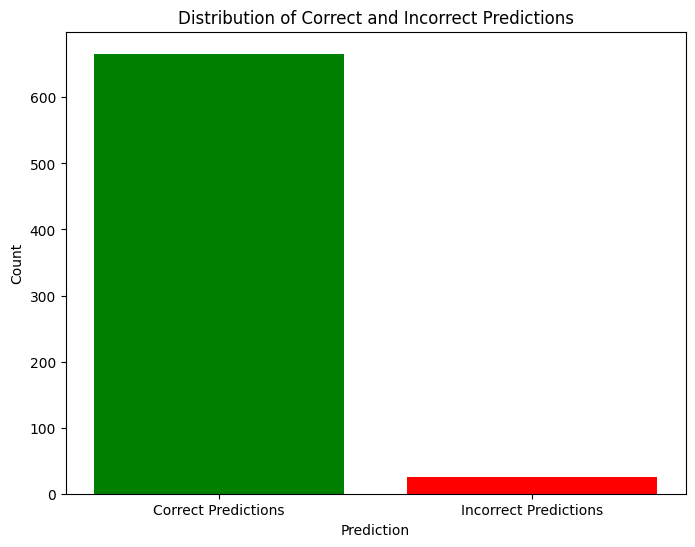

In [87]:
import matplotlib.pyplot as plt

# Convert predicted probabilities to class labels (0 or 1)
y_pred_classes = (y_predicted > 0.5).astype(int)

# Calculate correct and incorrect predictions
correct_predictions = (y_pred_classes == y_test).sum()
incorrect_predictions = len(y_test) - correct_predictions

# Plotting the distribution of correct and incorrect predictions
plt.figure(figsize=(8, 6))
plt.bar(['Correct Predictions', 'Incorrect Predictions'], [correct_predictions, incorrect_predictions], color=['green', 'red'])
plt.title('Distribution of Correct and Incorrect Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')
# Save the plot as a PNG image
plt.savefig('predictions_distribution.png')
# Show the plot
plt.show()

In [56]:
df.to_excel("predicted_data.xlsx", index=False)